**Set environment**

In [4]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
suppressMessages(suppressWarnings(library("coin")))
suppressMessages(suppressWarnings(library("pheatmap")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

MatchedGRanges_Cluster00_vs_inactive.rds 
MatchedGRanges_Cluster00_vs_others.rds 
MatchedGRanges_Cluster01_vs_inactive.rds 
MatchedGRanges_Cluster01_vs_others.rds 
MatchedGRanges_Cluster02_vs_inactive.rds 
MatchedGRanges_Cluster02_vs_others.rds 
MatchedGRanges_Cluster03_vs_inactive.rds 
MatchedGRanges_Cluster03_vs_others.rds 
MatchedGRanges_Cluster04_vs_inactive.rds 
MatchedGRanges_Cluster04_vs_others.rds 
MatchedGRanges_Cluster05_vs_inactive.rds 
MatchedGRanges_Cluster05_vs_others.rds 
MatchedGRanges_Cluster06_vs_inactive.rds 
MatchedGRanges_Cluster06_vs_others.rds 
MatchedGRanges_Cluster07_vs_inactive.rds 
MatchedGRanges_Cluster07_vs_others.rds 
MatchedGRanges_Cluster08_vs_inactive.rds 
MatchedGRanges_Cluster08_vs_others.rds 
MatchedGRanges_Cluster09_vs_inactive.rds 
MatchedGRanges_Cluster09_vs_others.rds 
MatchedGRanges_Cluster10_vs_inactive.rds 
MatchedGRanges_Cluster10_vs_others.rds 
MatchedGRanges_Cluster11_vs_inactive.rds 
MatchedGRanges_Cluster11_vs_others.rds 
MatchedGRanges_C

In [17]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "region.prepare.group.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_group = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 18341     5


Chrom,ChromStart,ChromEnd,Region,Group
chr1,100036895,100039189,chr1:100036895-100039189,Cluster00
chr1,100132375,100133491,chr1:100132375-100133491,Cluster00
chr1,100265562,100266994,chr1:100265562-100266994,Cluster00
chr1,10032429,10033763,chr1:10032429-10033763,Cluster13
chr1,100362769,100363401,chr1:100362769-100363401,Cluster00
chr1,100400445,100400762,chr1:100400445-100400762,Cluster01


In [3]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpracrispri_vote2_phenograph_neighbors070"
)
txt_fname = "results.enrich.fcc_cluster_vs_others.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary = dat
print(dim(dat))
fun_display_table(head(dat))

[1] 7815    6


Group,Feature,Stat,Pval,Score,Padj
Cluster00,H2AFZ,33.107126,0,1.6340344,0
Cluster00,H3K27ac,28.396013,0,1.3259570,0
Cluster00,H3K27me3,-10.903121,0,-1.2439611,0
Cluster00,H3K36me3,7.978978,0,-0.0091896,0
Cluster00,H3K4me1,-32.965805,0,-2.6867228,0
Cluster00,H3K4me2,48.054838,0,2.6115214,0


## Exploration plot

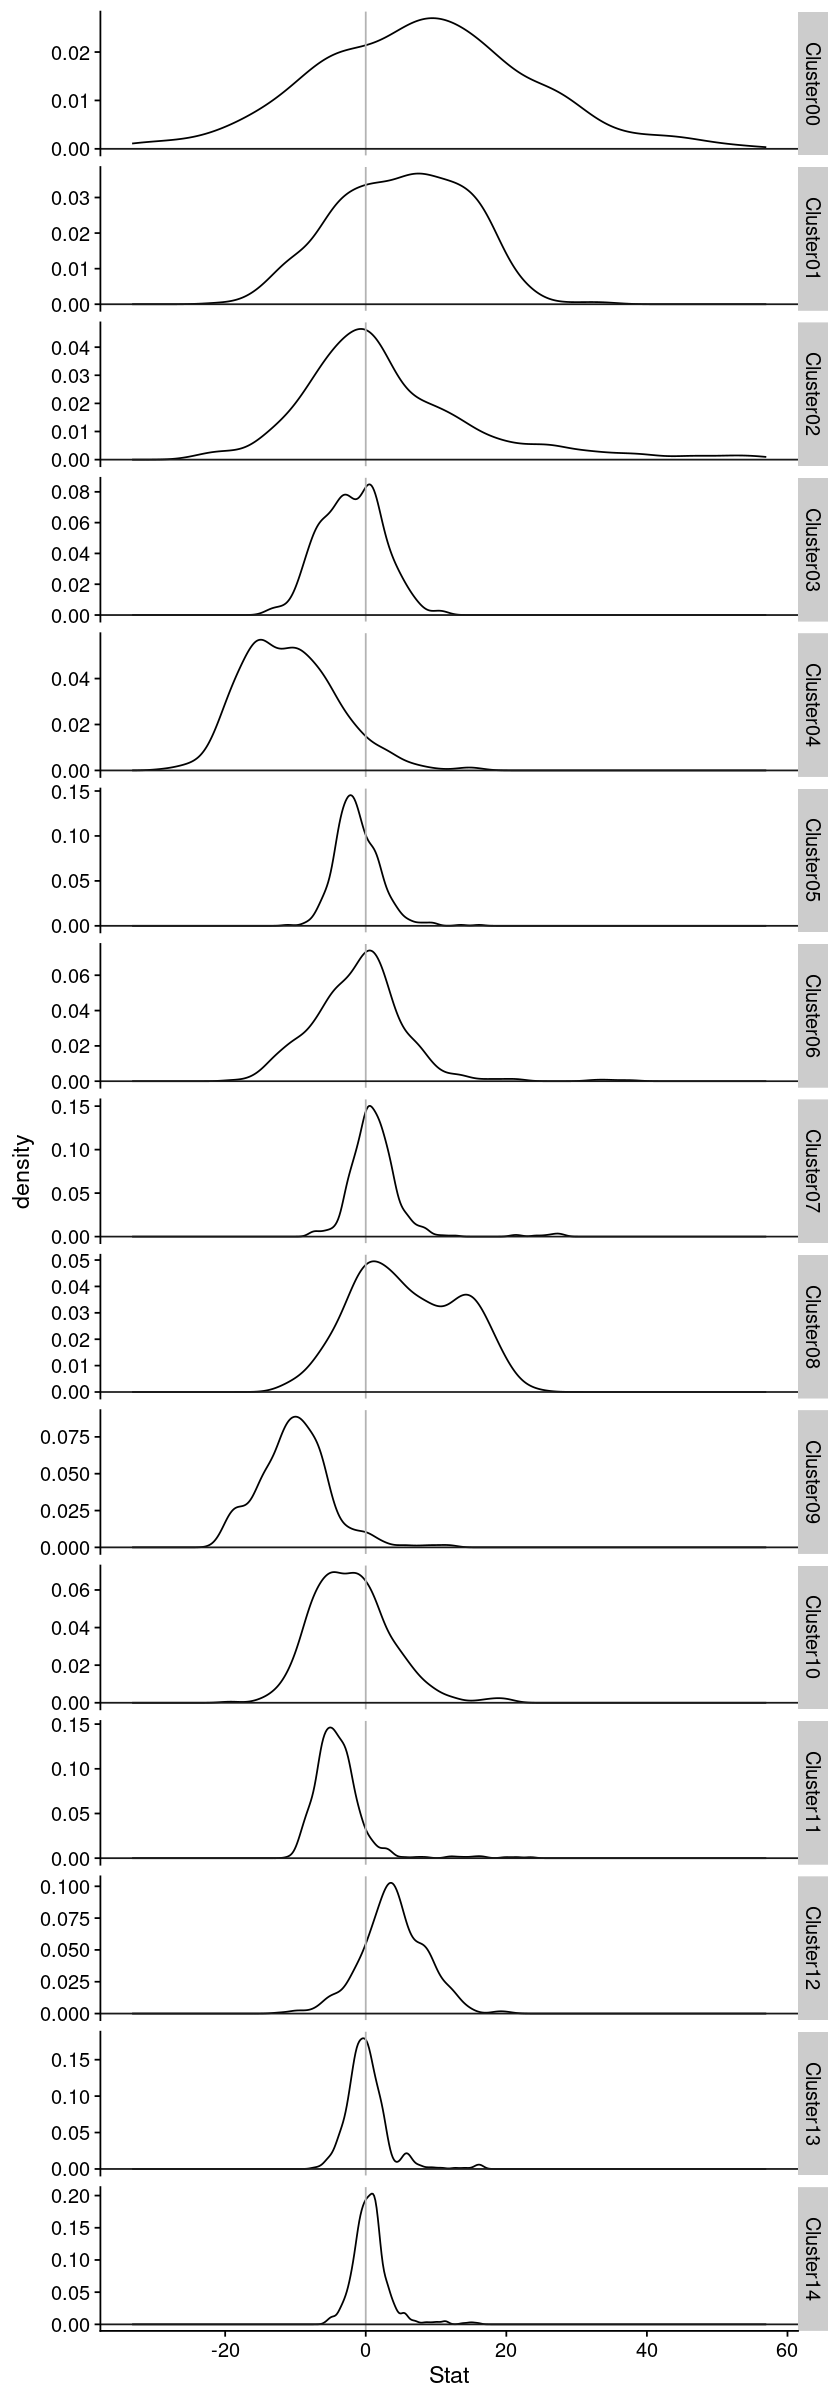

In [16]:
options(repr.plot.height = 20, repr.plot.width=7)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Stat)) + 
    geom_density() + 
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10") +
    theme_cowplot() +
    facet_grid(Group ~ ., scale = "free")

print(gpt)

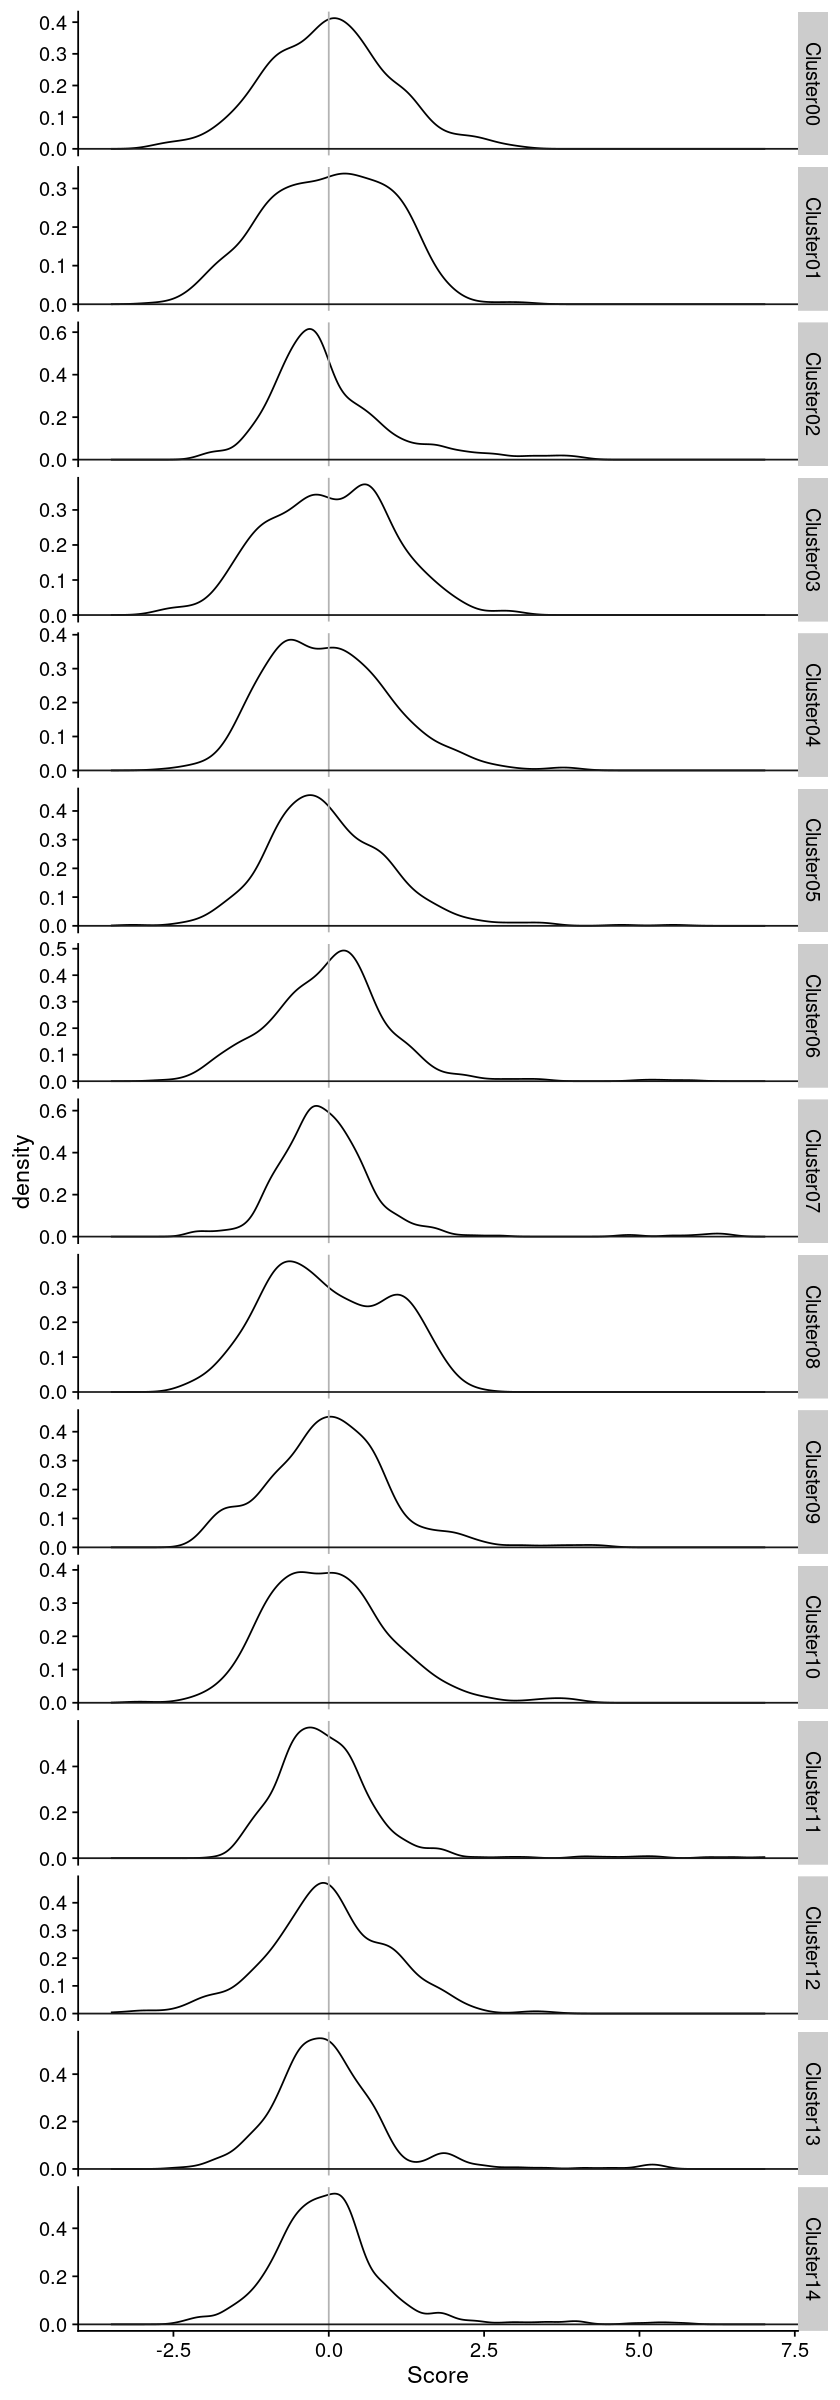

In [35]:
options(repr.plot.height = 20, repr.plot.width=7)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Score)) + 
    geom_density() + 
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10") +
    theme_cowplot() +
    facet_grid(Group ~ ., scale = "free")

print(gpt)

In [36]:
dat = dat_region_group
dat = dat %>% dplyr::group_by(Group) %>% dplyr::summarise(Count = dplyr::n())
dat = dat %>% dplyr::mutate(Label = paste0(Group, " (", Count, ")"))
dat_group_summary = dat
dat

Group,Count,Label
<chr>,<int>,<chr>
Cluster00,4629,Cluster00 (4629)
Cluster01,2508,Cluster01 (2508)
Cluster02,2341,Cluster02 (2341)
Cluster03,2301,Cluster03 (2301)
Cluster04,1876,Cluster04 (1876)
Cluster05,1087,Cluster05 (1087)
Cluster06,846,Cluster06 (846)
Cluster07,557,Cluster07 (557)
Cluster08,480,Cluster08 (480)


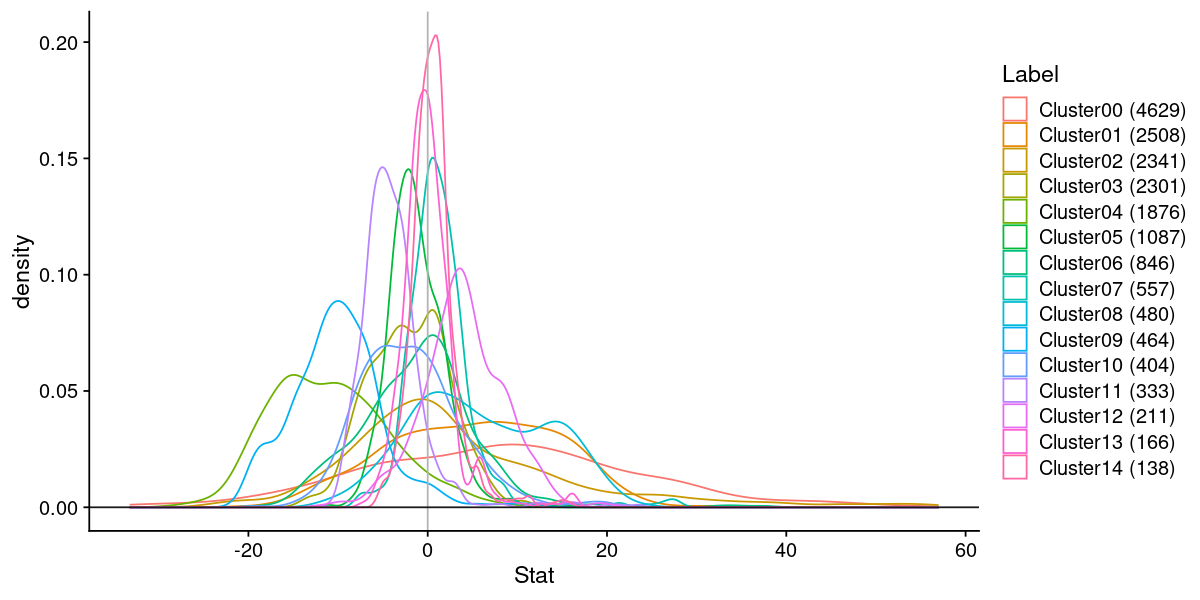

In [25]:
options(repr.plot.height = 5, repr.plot.width=10)
dat = dat_fit_summary
dat = dat %>% dplyr::left_join(dat_group_summary, by = "Group")

gpt = ggplot(dat, aes(x=Stat, color=Label)) + 
    geom_density() + 
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10") +
    theme_cowplot()

print(gpt)

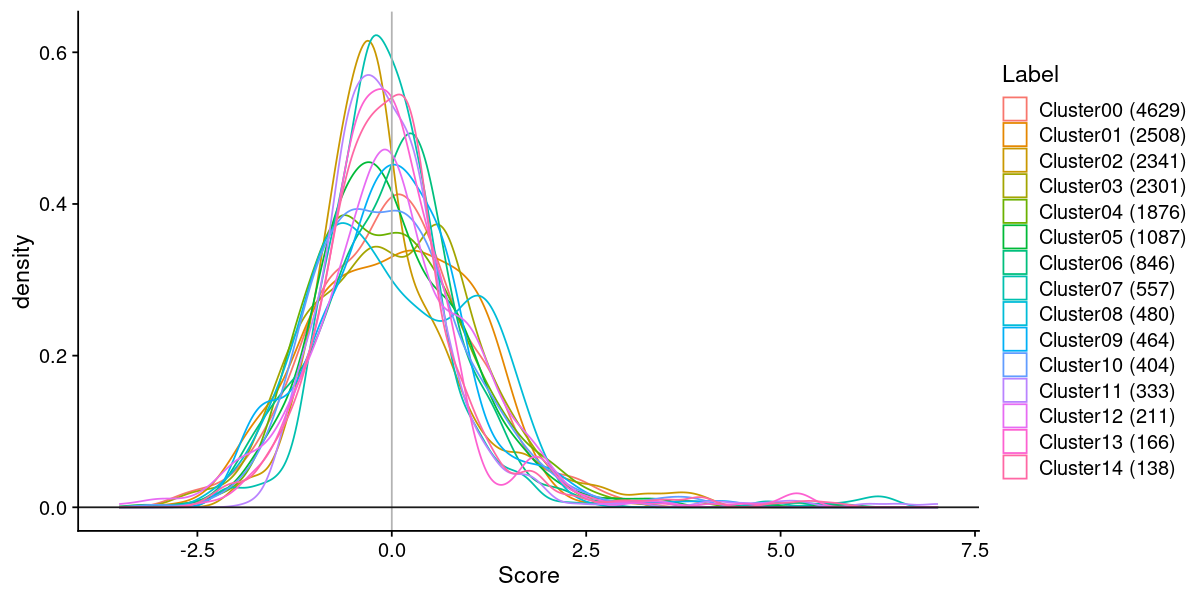

In [26]:
options(repr.plot.height = 5, repr.plot.width=10)
dat = dat_fit_summary
dat = dat %>% dplyr::left_join(dat_group_summary, by = "Group")

gpt = ggplot(dat, aes(x=Score, color=Label)) + 
    geom_density() + 
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10") +
    theme_cowplot()

print(gpt)

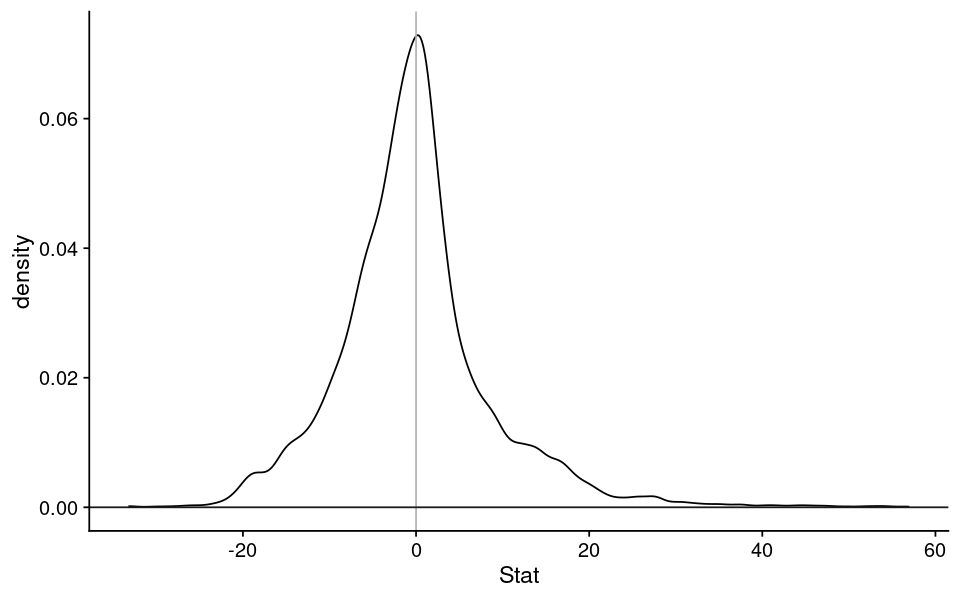

In [31]:
options(repr.plot.height = 5, repr.plot.width=8)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Stat)) + 
    geom_density() + 
    theme_cowplot() +
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10")

print(gpt)

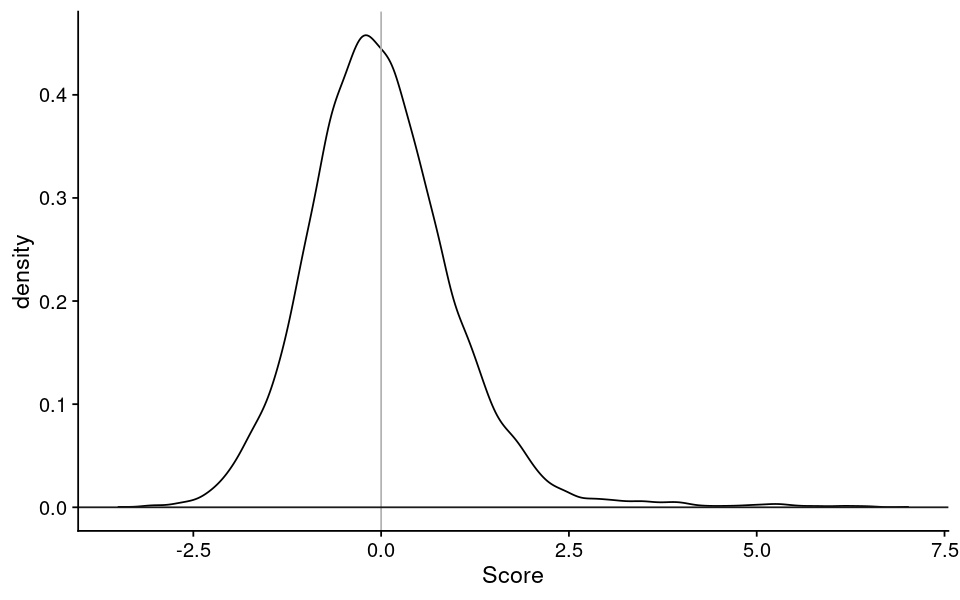

In [32]:
options(repr.plot.height = 5, repr.plot.width=8)
dat = dat_fit_summary
gpt = ggplot(dat, aes(x=Score)) + 
    geom_density() + 
    theme_cowplot() +
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10")

print(gpt)

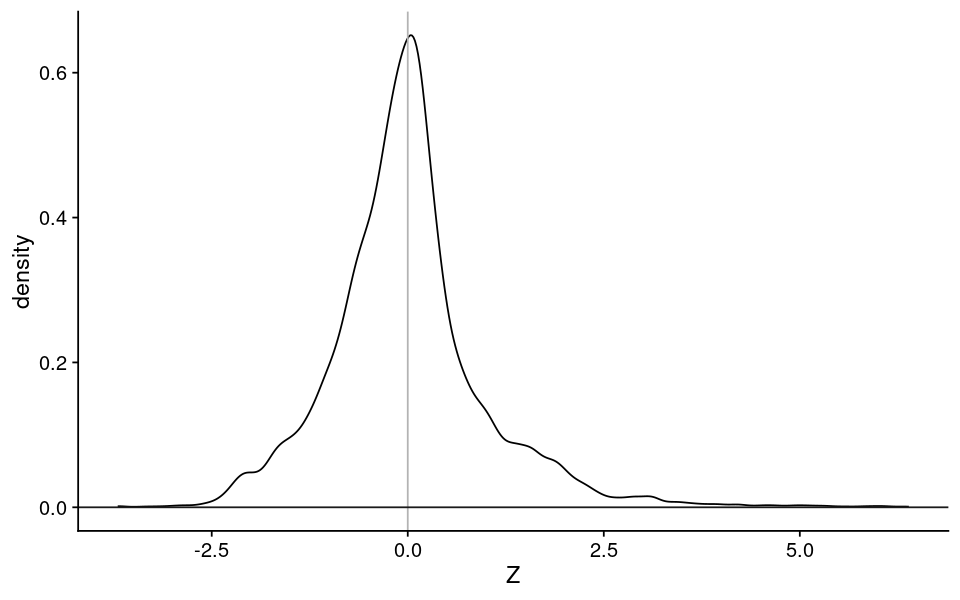

In [33]:
dat = dat_fit_summary
dat = dat %>% dplyr::mutate(Z=as.numeric(scale(Stat)))

options(repr.plot.height = 5, repr.plot.width=8)
gpt = ggplot(dat, aes(x=Z)) + 
    geom_density() + 
    theme_cowplot() +
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10")

print(gpt)

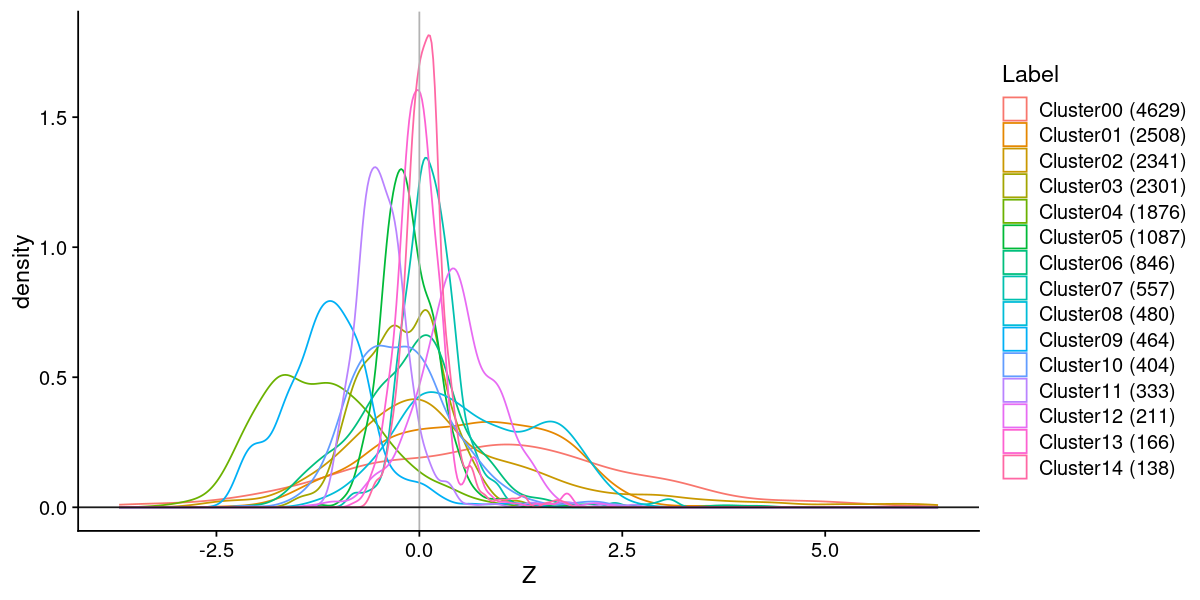

In [34]:
options(repr.plot.height = 5, repr.plot.width=10)
dat = dat_fit_summary
dat = dat %>% dplyr::mutate(Z=as.numeric(scale(Stat)))
dat = dat %>% dplyr::left_join(dat_group_summary, by = "Group")

gpt = ggplot(dat, aes(x=Z, color=Label)) + 
    geom_density() + 
    geom_vline(xintercept = 0, color = "grey70") +
    geom_hline(yintercept = 0, color = "grey10") +
    theme_cowplot()

print(gpt)